# 저렴한 주유소 찾기

In [1]:
import time
import pandas as pd 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

### 1. 셀레늄으로 서울시 구별 주유소 가격정보 얻기

In [2]:
url = 'https://www.opinet.co.kr/user/main/mainView.do' 
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [3]:
# 팝업메뉴 '싼 주유소 찾기 클릭'
driver.find_element(By.CSS_SELECTOR, '.ic_m1').click()


In [5]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]') 
metro.send_keys('서울')
time.sleep(1)


In [32]:
# 시군구 리스트 가져오기
sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
# gu_list1 = sigungu.find_elements(By.CSS_SELECTOR, 'option')

In [22]:
gu_list[0] # 리스트를 객체로 가져옴
# gu_list[0].text 값 확인

<selenium.webdriver.remote.webelement.WebElement (session="ccd87247026c37289f8029d5415d87d2", element="FC617989A6D81466232A94E6C07F382F_element_6273")>

In [33]:
# 가져온 구 옵션을 리스트로 만들기
gu_name = []
for gu in gu_list:
    # print(gu.text)
    gu_name.append(gu.text)
# gu_name = [gu.text for gu in gu_list]

In [34]:
print(gu_name)

['시/군/구', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [35]:
len(gu_name)

26

In [36]:
del gu_name[0]
print(gu_name)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [37]:
len(gu_name)

25

In [ ]:
# 엑셀 저장버튼
driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]/span').click()


In [38]:
# 25개 자치구에 대해서 주유소 정보 엑셀저장
for gu in gu_name:
    sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
    time.sleep(2)
    sigungu.send_keys(gu)
    time.sleep(2)
    
    driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

### 2. 구별 휘발유 가격에 대한 데이터 분석

In [39]:
from glob import glob

In [50]:
glob('C:/Users/tjoeun/Downloads/지역*.xls')

In [46]:
# !pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---------------------------------------- 96.5/96.5 kB 5.8 MB/s eta 0:00:00


In [52]:
df_list = []
for file in glob('C:/Users/tjoeun/Downloads/지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)

In [ ]:
df_list

In [54]:
df = pd.concat(df_list)
df.shape

(438, 10)

In [ ]:
df.head()

In [56]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634,N,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1676,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1685,Y,GS칼텍스


In [57]:
df.rename(columns={'휘발유' : '가격', '셀프여부':'셀프'}, inplace=True)
df.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634,N,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1676,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1685,Y,GS칼텍스


In [60]:
df.tail()

,상호,주소,가격,셀프,상표
27,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2198,N,HD현대오일뱅크
28,대청주유소,서울 강남구 개포로 654 (일원동),2199,N,SK에너지
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2395,N,SK에너지
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490,N,HD현대오일뱅크
31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [61]:
df.set_index('상호', inplace=True)

In [63]:
df.reset_index(inplace=True)

In [ ]:
df.tail()

In [ ]:
df['구'] = df.주소.apply(lambda x : x.split()[1])
df.head()

In [69]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [ ]:
df.info()

In [71]:
df.to_csv('data/opinet_20231214.csv', index=False)

## 셀프주유소가 저렴한가?

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [74]:
df.pivot_table('가격', '셀프', aggfunc=['count', 'mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
셀프,,,,,,
N,167,1787.077844,1525,2598,253.70384,64365.638482
Y,271,1607.073801,1523,2178,68.27088,4660.913052


Text(0.5, 1.0, '셀프여부에 따른 가격 boxplot')

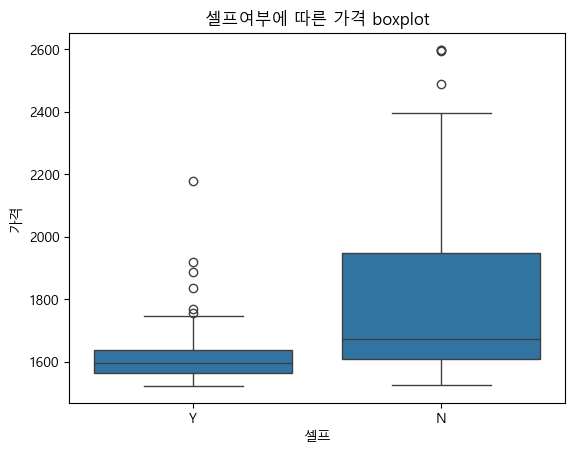

In [75]:
sns.boxplot(df, x='셀프', y='가격')
plt.title('셀프여부에 따른 가격 boxplot')

### 구별 휘발유 가격 비교

In [ ]:
df.pivot_table('가격', '구').sort_values('가격', ascending=False)

### 상표별 평균 가격

In [77]:
df.pivot_table('가격', '상표').sort_values('가격', ascending=False)

,가격
상표,
GS칼텍스,1711.679612
SK에너지,1707.866142
HD현대오일뱅크,1646.482759
S-OIL,1638.164557
자가상표,1633.000000
알뜰주유소,1554.500000
알뜰(ex),1539.000000
